# Fake news detection using machine learning

In [1]:
#importing necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

In [2]:
# taking first 100 rows of dataset and storing in a dataframe
dataframe_100 = pd.read_csv('fake and real news dataset.csv', nrows=100)

In [3]:
dataframe_100.shape

(100, 4)

In [4]:
dataframe_100.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
dataframe_100.tail()

,Unnamed: 0,title,text,label
95,8290,The Mandela Effect was made by one overlooked ...,"link There is simply no more denying, for mill...",FAKE
96,6227,CNN: One voter can make a difference by voting...,Channel list \nFollowing hurricane Matthew's f...,FAKE
97,3255,Give Social Security recipients a CEO-style raise,(CNN) On Veterans Day we recognize and honor t...,REAL
98,3177,"Fireworks erupt between Trump and Bush, Rubio ...",Sparks flew at the toughest and liveliest GOP ...,REAL
99,2832,"Obama, sounding like his critics, admits no 'c...",The online comment fits closely with his campa...,REAL


Text(0.5, 1.0, 'No. of fake and real news in first 100 rows')

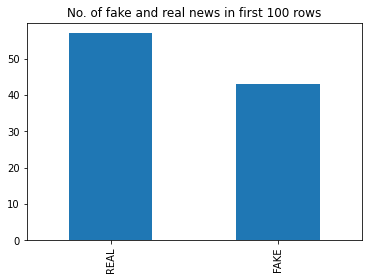

In [6]:
dataframe_100['label'].value_counts().plot(kind='bar')
plt.title('No. of fake and real news in first 100 rows')

Text(0.5, 1.0, 'percentage of fake and real news in first 100 rows')

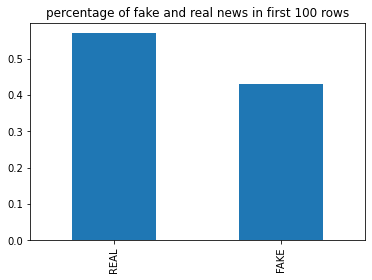

In [7]:
dataframe_100['label'].value_counts(normalize=True).plot(kind='bar')
plt.title('percentage of fake and real news in first 100 rows')

In [8]:
x_100 = dataframe_100['text']
y_100 = dataframe_100['label']

In [9]:
x_100

0     Daniel Greenfield, a Shillman Journalism Fello...
1     Google Pinterest Digg Linkedin Reddit Stumbleu...
2     U.S. Secretary of State John F. Kerry said Mon...
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...
4     It's primary day in New York and front-runners...
                            ...                        
95    link There is simply no more denying, for mill...
96    Channel list \nFollowing hurricane Matthew's f...
97    (CNN) On Veterans Day we recognize and honor t...
98    Sparks flew at the toughest and liveliest GOP ...
99    The online comment fits closely with his campa...
Name: text, Length: 100, dtype: object

In [10]:
y_100

0     FAKE
1     FAKE
2     REAL
3     FAKE
4     REAL
      ... 
95    FAKE
96    FAKE
97    REAL
98    REAL
99    REAL
Name: label, Length: 100, dtype: object

In [11]:
#spliting the dataset into 80% for training and 20% for testing
x_100_train,x_100_test,y_100_train,y_100_test = train_test_split(x_100,y_100,test_size=0.2,random_state=0)

In [12]:
x_100_train.shape

(80,)

In [13]:
x_100_train

43    Homeless Woman Protects Trump’s Walk of Fame S...
62    Buried beneath Wednesday's eye-popping headlin...
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...
71    Radio Aryan October 28, 2016 \nSven Longshanks...
45    By Dan Zukowski\nThree major U.S. pipeline spi...
                            ...                        
96    Channel list \nFollowing hurricane Matthew's f...
67    GOP opposes the kind of antitrust regulation t...
64    While the country has been fixated on Donald T...
47    The move would make it easier for the Trump ad...
44    WHITE PLAINS, N.Y. — Not to be outdone by her ...
Name: text, Length: 80, dtype: object

In [14]:
y_100_train

43    FAKE
62    REAL
3     FAKE
71    FAKE
45    FAKE
      ... 
96    FAKE
67    REAL
64    REAL
47    REAL
44    REAL
Name: label, Length: 80, dtype: object

In [15]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)

In [16]:
tfid_x_100_train = tfvect.fit_transform(x_100_train)
tfid_x_100_test = tfvect.transform(x_100_test)

In [17]:
#taking whole dataset and storing in a dataframe
dataframe = pd.read_csv('fake and real news dataset.csv')
dataframe.shape

(6335, 4)

Text(0.5, 1.0, 'No. of fake and real news in whole dataset')

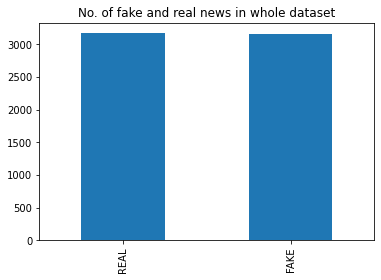

In [18]:
dataframe['label'].value_counts().plot(kind='bar')
plt.title('No. of fake and real news in whole dataset')

Text(0.5, 1.0, 'Percentage of fake and real news in whole dataset')

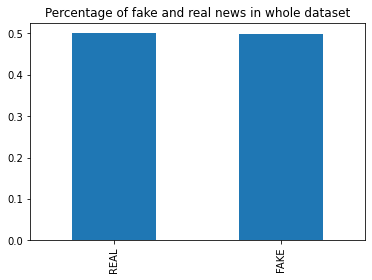

In [19]:
dataframe['label'].value_counts(normalize=True).plot(kind='bar')
plt.title('Percentage of fake and real news in whole dataset')

In [20]:
dataframe.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [21]:
dataframe.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [22]:
x = dataframe['text']
y = dataframe['label']

In [23]:
x

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [24]:
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [25]:
#spliting the dataset into 80% for training and 20% for testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
x_train.shape

(5068,)

In [27]:
x_test.shape

(1267,)

In [28]:
x_train

2402    Christian Whiton is a former deputy special en...
1922    Super Tuesday Brings Harsh Light And Heartache...
3475    Prev post Page 1 of 4 Next \nNurses are among ...
6197    The deadly hostage situation at a luxury hotel...
4748    Our new country: Women and minorities hit hard...
                              ...                        
4931    Twenty-two of the 37 corporations nominated fo...
3264    As pieces of luggage, human remains, wreckage ...
1653    0 Add Comment \nIN THE immediate aftermath of ...
2607    Palestine Palestinians check the flat of Amjad...
2732    For the second week in a row, there was a temp...
Name: text, Length: 5068, dtype: object

In [29]:
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

In [30]:
x_test

3789    Watch the above reports by CBN's David Brody a...
733     — Bernie Sanders (@BernieSanders) October 27, ...
4783    \nAs of October 29, there have been at least 1...
3067    Members of Congress have said that if Hillary ...
5288    Julian Zelizer is a professor of history and p...
                              ...                        
5121    On the front lines of the battle against the I...
6112    Several gunmen seized a luxury hotel in Mali’s...
2661      Paul Joseph Watson Bureaucrat who said “stup...
59      Republican presidential front-runner Donald Tr...
4573    You can buy snacks, condoms, fishing bait, mar...
Name: text, Length: 1267, dtype: object

In [31]:
y_test

3789    REAL
733     FAKE
4783    FAKE
3067    FAKE
5288    REAL
        ... 
5121    REAL
6112    REAL
2661    FAKE
59      REAL
4573    REAL
Name: label, Length: 1267, dtype: object

In [32]:
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)

# Machine Learning Models & Training of the models

## 1. KNN Classifier

### A. Training data size = 80 rows

In [33]:
KNN_100_Classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )

In [34]:
KNN_100_Classifier.fit(tfid_x_100_train,y_100_train)

KNeighborsClassifier()

In [35]:
KNN_y_100_pred = KNN_100_Classifier.predict(tfid_x_100_test)
KNN_100_score = accuracy_score(y_100_test,KNN_y_100_pred)
print('score:', KNN_100_score)

score: 0.7


In [36]:
print('Accuracy of KNN classifier is :', round(KNN_100_score*100,2),'%')
KNN_100_cf = confusion_matrix(y_100_test,KNN_y_100_pred, labels=['FAKE','REAL'])
print("Confusion matrix of KNN classifier with training data size 80: ")
print(KNN_100_cf)

Accuracy of KNN classifier is : 70.0 %
Confusion matrix of KNN classifier with training data size 80: 
[[5 4]
 [2 9]]


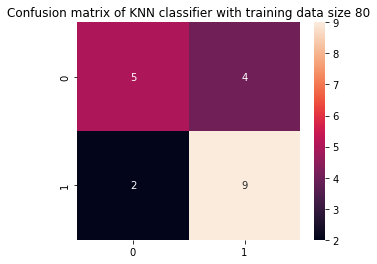

In [37]:
plt.figure(figsize=(5,4))
sns.heatmap(KNN_100_cf, annot = True, fmt = 'd')
plt.title("Confusion matrix of KNN classifier with training data size 80")
plt.show()

### B. Training data size = 5068 rows

In [38]:
KNNClassifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )

In [39]:
KNNClassifier.fit(tfid_x_train,y_train)

KNeighborsClassifier()

In [40]:
KNN_y_pred = KNNClassifier.predict(tfid_x_test)
KNN_score = accuracy_score(y_test,KNN_y_pred)
print('score:', KNN_score)

score: 0.5611681136543015


In [41]:
print('Accuracy of KNN classifier:', round(KNN_score*100,2),'%')
KNN_cf = confusion_matrix(y_test,KNN_y_pred, labels=['FAKE','REAL'])
print("Confusion matrix of KNN classifier with training data size 5068 :")
print(KNN_cf)

Accuracy of KNN classifier: 56.12 %
Confusion matrix of KNN classifier with training data size 5068 :
[[615   0]
 [556  96]]


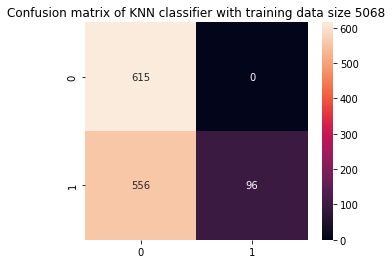

In [42]:
plt.figure(figsize=(5,4))
sns.heatmap(KNN_cf, annot = True, fmt = 'd')
plt.title("Confusion matrix of KNN classifier with training data size 5068")
plt.show()

#### ploting graph 

Text(0.5, 1.0, 'K-nearest neighbors algorithm')

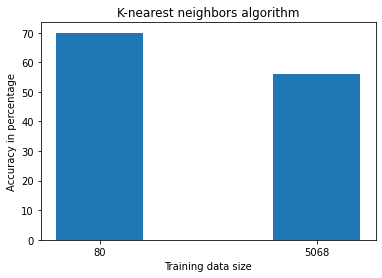

In [43]:
x_KNN=["80", "5068"]
h_KNN=[round(KNN_100_score*100,2), round(KNN_score*100,2)]
plt.bar(x_KNN,h_KNN,width=0.4)
plt.xlabel("Training data size")
plt.ylabel("Accuracy in percentage")
plt.title("K-nearest neighbors algorithm")

## 2. Logistic Regression

### A. Training data size = 80 rows

In [44]:
LR_100_Classifier = LogisticRegression(random_state=0)

In [45]:
LR_100_Classifier.fit(tfid_x_100_train, y_100_train)

LogisticRegression(random_state=0)

In [46]:
LR_y_100_pred = LR_100_Classifier.predict(tfid_x_100_test)
LR_100_score = accuracy_score(y_100_test,LR_y_100_pred)
print('score:', LR_100_score)

score: 0.65


In [47]:
print('Accuracy of LR classifier:', round(LR_100_score*100,2),'%')
LR_100_cf = confusion_matrix(y_100_test,LR_y_100_pred, labels=['FAKE','REAL'])
print("Confusion matrix of LR classifier with training data size 80 :")
print(LR_100_cf)

Accuracy of LR classifier: 65.0 %
Confusion matrix of LR classifier with training data size 80 :
[[ 2  7]
 [ 0 11]]


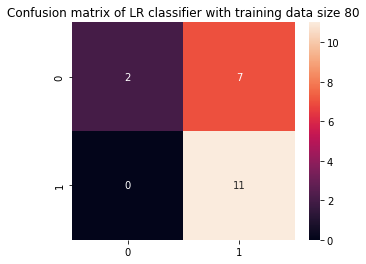

In [48]:
plt.figure(figsize=(5,4))
sns.heatmap(LR_100_cf, annot = True, fmt = 'd')
plt.title("Confusion matrix of LR classifier with training data size 80")
plt.show()

### B. Training data size = 5068 rows

In [49]:
LRClassifier = LogisticRegression(random_state=0)

In [50]:
LRClassifier.fit(tfid_x_train, y_train)

LogisticRegression(random_state=0)

In [51]:
LR_y_pred = LRClassifier.predict(tfid_x_test)
LR_score = accuracy_score(y_test,LR_y_pred)
print('score:', LR_score)

score: 0.9155485398579322


In [52]:
print('Accuracy of LR classifier:', round(LR_score*100,2),'%')
LR_cf = confusion_matrix(y_test,LR_y_pred, labels=['FAKE','REAL'])
print("Confusion matrix of LR classifier with training data size 5068: ")
print(LR_cf)

Accuracy of LR classifier: 91.55 %
Confusion matrix of LR classifier with training data size 5068: 
[[570  45]
 [ 62 590]]


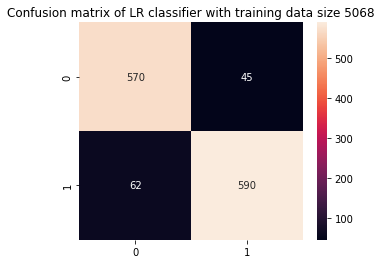

In [53]:
plt.figure(figsize=(5,4))
sns.heatmap(LR_cf, annot = True, fmt = 'd')
plt.title("Confusion matrix of LR classifier with training data size 5068")
plt.show()

#### Ploting graph

Text(0.5, 1.0, 'Logistic regression')

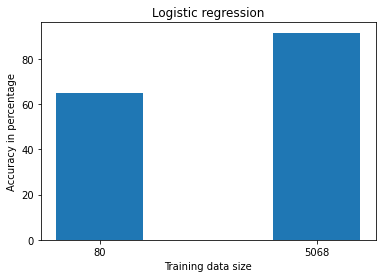

In [54]:
x_LR=["80", "5068"]
h_LR=[round(LR_100_score*100,2), round(LR_score*100,2)]
plt.bar(x_LR,h_LR,width=0.4)
plt.xlabel("Training data size")
plt.ylabel("Accuracy in percentage")
plt.title("Logistic regression")

## 3. Passive agressive classifier

### A. Training data size = 80 rows

In [55]:
PA_100_Classifier = PassiveAggressiveClassifier(max_iter=50)

In [56]:
PA_100_Classifier.fit(tfid_x_100_train,y_100_train)

PassiveAggressiveClassifier(max_iter=50)

In [57]:
PAC_y_100_pred = PA_100_Classifier.predict(tfid_x_100_test)
PAC_100_score = accuracy_score(y_100_test,PAC_y_100_pred)
print('score:', PAC_100_score)

score: 0.85


In [58]:
print('Accuracy of PA classifier:', round(PAC_100_score*100,2),'%')
PAC_100_cf = confusion_matrix(y_100_test,PAC_y_100_pred, labels=['FAKE','REAL'])
print("Confusion matrix of PA classifier with training data size 80 :")
print(PAC_100_cf)

Accuracy of PA classifier: 85.0 %
Confusion matrix of PA classifier with training data size 80 :
[[ 7  2]
 [ 1 10]]


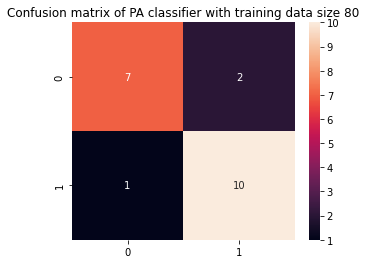

In [59]:
plt.figure(figsize=(5,4))
sns.heatmap(PAC_100_cf, annot = True, fmt = 'd')
plt.title("Confusion matrix of PA classifier with training data size 80")
plt.show()

### B. Training data size = 5068 rows

In [60]:
PAClassifier = PassiveAggressiveClassifier(max_iter=50)

In [61]:
PAClassifier.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [62]:
PAC_y_pred = PAClassifier.predict(tfid_x_test)
PAC_score = accuracy_score(y_test,PAC_y_pred)
print('score:', PAC_score)

score: 0.9321231254932912


In [63]:
print('Accuracy of PA classifier:', round(PAC_score*100,2),'%')
PAC_cf = confusion_matrix(y_test,PAC_y_pred, labels=['FAKE','REAL'])
print("Confusion matrix of PA classifier with training data size 5068: ")
print(PAC_cf)

Accuracy of PA classifier: 93.21 %
Confusion matrix of PA classifier with training data size 5068: 
[[570  45]
 [ 41 611]]


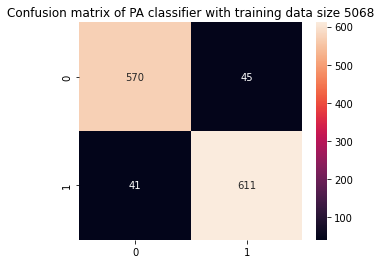

In [64]:
plt.figure(figsize=(5,4))
sns.heatmap(PAC_cf, annot = True, fmt = 'd')
plt.title("Confusion matrix of PA classifier with training data size 5068")
plt.show()

#### Ploting graph

Text(0.5, 1.0, 'Passive Aggressive Classifier')

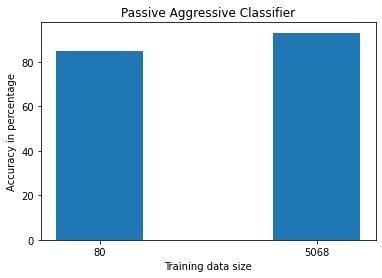

In [65]:
x_PAC=["80", "5068"]
h_PAC=[round(PAC_100_score*100,2), round(PAC_score*100,2)]
plt.bar(x_PAC,h_PAC,width=0.4)
plt.xlabel("Training data size")
plt.ylabel("Accuracy in percentage")
plt.title("Passive Aggressive Classifier")

# Comparison of three classifiers

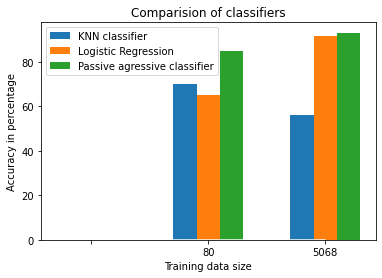

In [66]:
training_data_size = [' ','80', '5068']

t_KNN = [0, round(KNN_100_score*100,2), round(KNN_score*100,2)]
t_LR  = [0, round(LR_100_score*100,2), round(LR_score*100,2)]
t_PA  = [0, round(PAC_100_score*100,2), round(PAC_score*100,2)]

fig,ax = plt.subplots()
width = 0.2

temp = [0, 0, 0]
t_KNN_1 = [x - width for x in range (len(t_KNN))]
t_LR_1 = [x for x in range (len(t_LR))]
t_PA_1 = [x + width for x in range (len(t_PA))]

ax.bar(t_KNN_1,t_KNN,width, label = "KNN classifier")
ax.bar(t_LR_1,t_LR,width, label = "Logistic Regression")
ax.bar(t_PA_1, t_PA, width, label = '''Passive agressive classifier''')

ax.set_ylabel("Accuracy in percentage")
ax.set_xlabel("Training data size")
ax.set_title("Comparision of classifiers")
ax.plot(training_data_size, temp, color = 'white')
plt.legend()
plt.show()

# Using Passive agressive classifier to predict the fake news

In [67]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = PAClassifier.predict(vectorized_input_data)
    print(prediction)

In [68]:
fake_news_det(""" Arnaldo Rodgers is a trained and educated Psychologist. He has worked as a community organizer and 
activist. “Honor Our Immigrant Veterans” Replayed By Arnaldo Rodgers on November 8, 2016 Veterans By elizawhig 
“Honor Our Immigrant Veterans” from VoteVets is a video on Youtube I tripped over recently, and have watched several 
times. It is that good. Another Kossack may have already posted it, but I would like to get it some play. Not because 
I think it will change any voter’s mind, but because it deserves to be seen to remind us of who we are as Americans. 
We are all immigrants or the children of immigrants, and we and our relatives and grandparents have had to make tough 
choices that deserve to be remembered. I had an uncle (by marriage) who was Italian. In 1940 he was still not a US 
citizen, although I gather he had begun the process, so he was sent to an internment camp in Wyoming (or Montana?). 
While he waited for his citizenship application to be completed, he and his fellow detainees played a lot of poker. 
His papers were finally processed, he was made a US Citizen, then was promptly drafted into the US Army as a Sargent 
(Supply). And of course he was sent to…Italy. His division survived Anzio, then my uncle came into his glory. His 
father was someone of importance further north, so he had connections. He was able to secure excellent billets (in a 
castle) and good food and drink for his comrades. """)

['FAKE']


In [69]:
fake_news_det("""Here is Elon Musk’s True Mars On Earth Plan 11/01/2016 GAME N GUIDE Elon Musk, the founder of SpaceX 
recently held a Reddit Ask Me Anything session at 6:00 p.m. ET on Oct. 23. The session was said to be a follow-up to 
the executive’s speech in Mexico last month. Musk unveiled his plans for a refueling site and eventually habitation in
the methane-rich planet. SpaceX is said to have raised more questions lately than it has revealed. The inventor and 
conglomerate went to Twitter to announce the session, Engadget reported. For instance, the company’s plan on 
colonizing Mars is yet to be discussed as well as the reliability of its space rockets and how it can be improved. In 
addition, the company also previously revealed that it would be reusing their rockets but have kept mum on how. 
Previously, Musk had a speech at the International Astronautical Congress in Guadalajara, Mexico in September. In the 
said Congress, Musk revealed his plans of sending humans to Mars apparently costing a whooping $10 billion each. 
Moreover he stated that humans will be turned into a multi-planetary species within the span of 40 years to a century.
Musk revealed his vision with massive reusable rockets launching into a parking orbit stating that the rockets may be 
refueled by propellant tankers. Additionally, Musk plans to launch a thousand spaceships with a hundred people each 
en masse for Mars. He further revealed that a refueling station would be placed on the red planet to harvest methane 
fuel so settlers may come back to Earth. Hence, the first rocket to be sent is the Dragon spacecraft to search for a 
site to plant the refueling station followed by a spaceship with equipment to build the refueling station, LA Times 
reported. Musk went on to describe his ideal vision for human habitation on Mars. Musk revealed that glass panels 
with carbon fiber frames would be brought to the red planet to build geodesic domes on the planet’s surface. 
Furthermore, several miner and tunneling droids would also be sent to Mars. The droids are expected to be used to 
build large quantities of pressurized space for industrial operations along with glass domes for green living. 
Watch Elon Musk’s Mars colonization event in 5 minutes. """)

['FAKE']
